In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
batch_size = 32
img_height = 256
img_width = 256

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(
  "folder",
    seed=123,
      image_size=(img_height, img_width),
  batch_size=batch_size)

Found 69690 files belonging to 166 classes.


In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
class_names = data.class_names
print(class_names)

['Abutilon', 'Agapanthus', 'Ageratum', 'Alchemilla', 'Allium', 'Alstroemeria', 'Alyssum', 'Amaranthus', 'Amaryllis', 'Anemone', 'Aster', 'Azalea', "Baby'sBreath", "Bachelor'sButton", 'BalloonFlower', 'Ballota', 'BeeBalm', 'Begonia', 'Bellflower', 'Bergamot', 'Bergenia', 'Billbergia', 'Black-eyedSusan', 'BlazingStar', 'BleedingHeart', 'Bletilla', 'Blue-eyedGrass', 'Bottlebrush', 'Brachyscome', 'ButterflyBush', 'Calceolaria', 'Candytuft', 'CannaLily', 'CapePrimrose', 'CardinalFlower', 'Catharanthus', 'Catmint', 'Celosia', 'CerastiumTomentosum', 'Chicory', 'Chionodoxa', 'Chrysanthemum', 'Clarkia', 'Clematis', 'Coneflower', 'CoralBells', 'CoralVine', 'Coreopsis', 'Cornflower', 'Corydalis', 'Cosmos', 'Cotoneaster', 'Crocosmia', 'CrownImperial', 'CuckooFlower', 'Cyclamen', 'Dahlia', 'Daphne', 'Daylily', 'Deutzia', 'Dianthusbarbatus', 'Diascia', 'Dietes', 'Echinops', 'Echium', 'EnglishBluebell', 'Epimedium', 'Eremurus', 'Erica', 'Erigeron', 'EveningPrimrose', 'FallCrocus', 'Feverfew', 'Fireth

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(16, 180, 180, 3)
(16,)


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


3485/3485 [==============================] - 159s 45ms/step - loss: 4.2125 - accuracy: 0.0930 - val_loss: 3.6731 - val_accuracy: 0.1764
Epoch 2/10
3485/3485 [==============================] - 157s 45ms/step - loss: 2.9570 - accuracy: 0.3095 - val_loss: 3.0871 - val_accuracy: 0.3083
Epoch 3/10
3485/3485 [==============================] - 155s 44ms/step - loss: 1.7066 - accuracy: 0.5828 - val_loss: 3.0346 - val_accuracy: 0.4402
Epoch 4/10
3485/3485 [==============================] - 156s 45ms/step - loss: 0.8339 - accuracy: 0.7854 - val_loss: 3.4200 - val_accuracy: 0.5250
Epoch 5/10
3485/3485 [==============================] - 153s 44ms/step - loss: 0.4468 - accuracy: 0.8777 - val_loss: 3.9527 - val_accuracy: 0.5638
Epoch 6/10
3485/3485 [==============================] - 151s 43ms/step - loss: 0.3114 - accuracy: 0.9123 - val_loss: 4.3953 - val_accuracy: 0.5894
Epoch 7/10
3485/3485 [==============================] - 152s 44ms/step - loss: 0.2440 - accuracy: 0.9297 - val_loss:

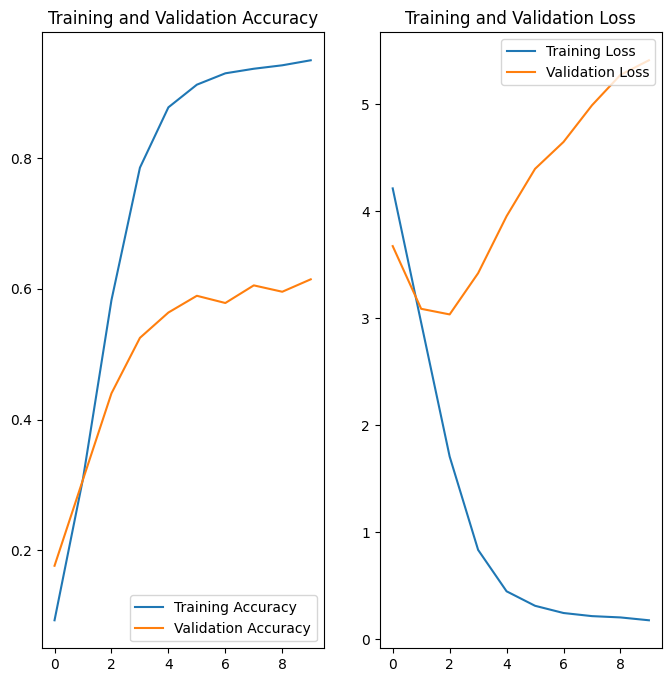

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

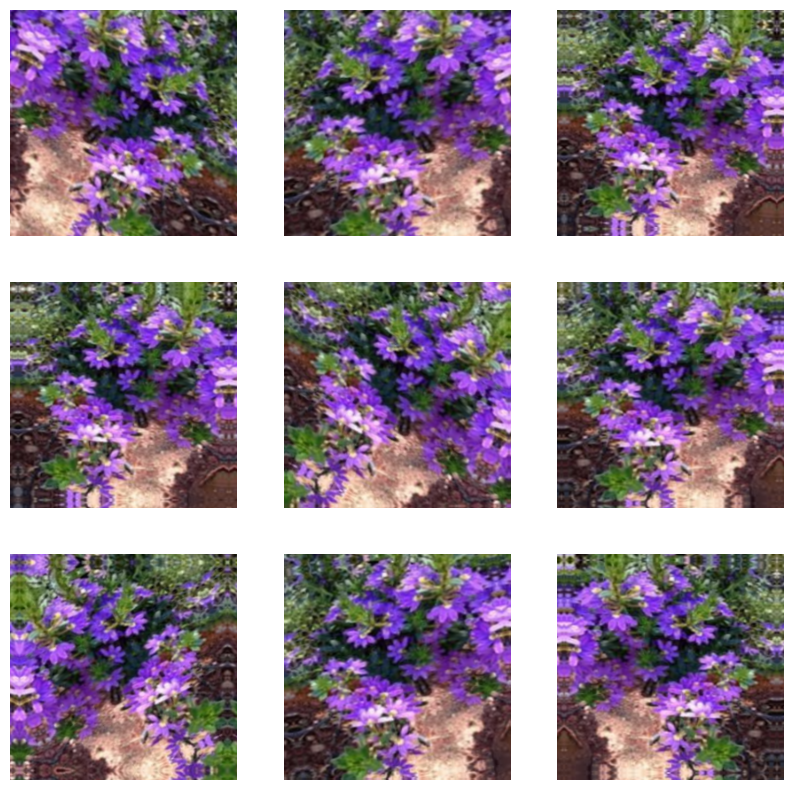

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes, activation='softmax', name="outputs")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_12 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 conv2d_42 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 128, 128, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                               

In [ ]:
epochs = 50
history = model.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/50
1524/1524 [==============================] - 295s 194ms/step - loss: 1.8832 - accuracy: 0.5073 - val_loss: 2.4692 - val_accuracy: 0.4233
Epoch 2/50
1524/1524 [==============================] - 298s 195ms/step - loss: 1.8693 - accuracy: 0.5096 - val_loss: 2.3420 - val_accuracy: 0.4403
Epoch 3/50
1524/1524 [==============================] - 297s 195ms/step - loss: 1.8230 - accuracy: 0.5199 - val_loss: 2.3089 - val_accuracy: 0.4533
Epoch 4/50
1524/1524 [==============================] - 291s 191ms/step - loss: 1.8063 - accuracy: 0.5218 - val_loss: 2.3850 - val_accuracy: 0.4402
Epoch 5/50
1524/1524 [==============================] - 296s 194ms/step - loss: 1.7912 - accuracy: 0.5292 - val_loss: 2.4936 - val_accuracy: 0.4189
Epoch 6/50
1524/1524 [==============================] - 291s 191ms/step - loss: 1.7692 - accuracy: 0.5305 - val_loss: 2.3776 - val_accuracy: 0.4486
Epoch 7/50
1524/1524 [==============================] - 297s 195ms/step - loss: 1.7603 - accuracy: 0.5347 - val_

In [ ]:
model.save(os.path.join('models','imageclassifier-5cnn-50-epochs.keras'))

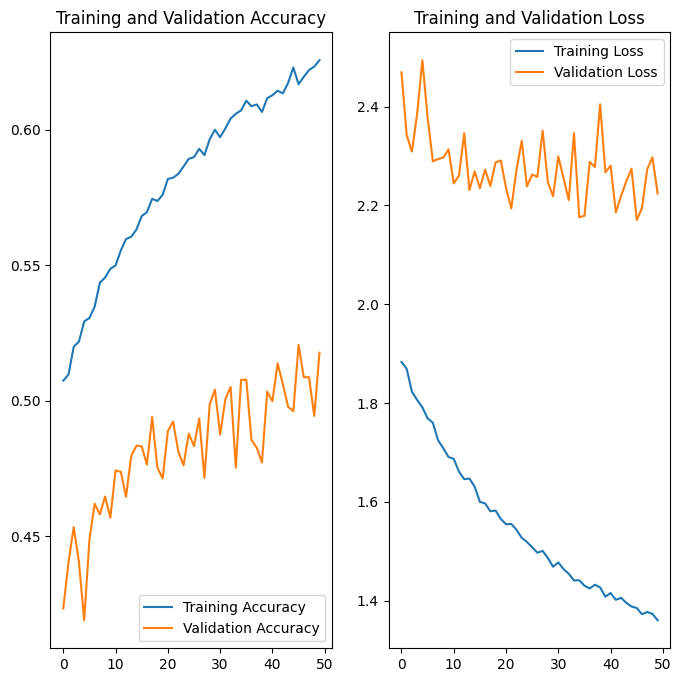

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
loss,accuracy = model.evaluate(test)

217/217 [==============================] - 84s 56ms/step - loss: 2.2121 - accuracy: 0.5199
